# Assignment 4
## Note: DON'T RUN THIS UNTIL YOU HAVE MADE SURE YOUR CODE WORKS LOCALLY; THIS NOTEBOOK TAKES **~1 HOUR TO RUN**.

## See https://edstem.org/us/courses/33056/discussion/2523780 For a guide to use Colab GPUs.

Please make a copy of this Colab notebook in your own Google Drive to edit it.

This serves as an Azure alternative in case we have a dreadful case of GPU shortage. Feel free to copy this setup for other assignments.

## 1. Upload your files

### Option 1: Upload your files to your Google Drive, and mount the drive
You can upload your files to your own Google drive. This is the ''safest'' way to set up the Colab, since your files are stored in your Google Drive instead of the Colab Runtime, which may terminate if you leave it on for too long (~8 hours, or if you put your laptop to sleep mode) and lose your files. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Option 2: Zip your folder, upload, then unzip
Zip your code folder. Upload the folder of your code to the runtime (drag and drop) so that the structure of Files would look like the following:
- ..
- sample_data
- your_folder.zip

Then run the following code block to unzip the file.

NOTE THAT IF YOU LEAVE YOUR COLAB NOTEBOOK ALONE FOR TOO LONG, THERE IS A RISK THAT YOU WILL LOSE YOUR FILES.

In [ ]:
! unzip /content/drive/MyDrive/student.zip # replace this with the name of your zip file

Archive:  /content/drive/MyDrive/student.zip
 extracting: student/__init__.py     
   creating: student/__pycache__/
  inflating: student/__pycache__/model_embeddings.cpython-39.pyc  
  inflating: student/__pycache__/nmt_model.cpython-39.pyc  
  inflating: student/__pycache__/utils.cpython-39.pyc  
  inflating: student/__pycache__/vocab.cpython-39.pyc  
  inflating: student/collect_submission.bat  
  inflating: student/collect_submission.sh  
 extracting: student/gpu_requirements.txt  
  inflating: student/local_env.yml   
  inflating: student/model_embeddings.py  
  inflating: student/nmt_model.py    
   creating: student/outputs/
 extracting: student/outputs/.gitignore  
  inflating: student/README.md       
  inflating: student/run.bat         
  inflating: student/run.py          
  inflating: student/run.sh          
  inflating: student/sanity_check.py  
   creating: student/sanity_check_en_es_data/
  inflating: student/sanity_check_en_es_data/combined_outputs.pkl  
  inflating: 

##2. Install Dependencies

Run the following cell to install dependencies for this assignment.

In [ ]:
!pip install docopt sentencepiece sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=caa7c7f7ff446d306e4b6245a21a53444ceb606ddfed3a40ffa7da34818867d0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


## 3. Relocate to your code directory

In [ ]:
%cd /content/student
! ls # verify that you are in the right directory

/content/student
collect_submission.bat	nmt_model.py  run.sh		       tgt.vocab
collect_submission.sh	outputs       sanity_check_en_es_data  utils.py
gpu_requirements.txt	__pycache__   sanity_check.py	       vocab.json
__init__.py		README.md     src.model		       vocab.py
local_env.yml		run.bat       src.vocab		       zh_en_data
model_embeddings.py	run.py	      tgt.model


## 4. Run assignment-specific commands

To run on GPU, please make sure your runtime type is using the GPU accelerator! To do so, click on:

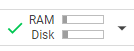

on the upper-right hand corner, then click "Change runtime type" in the bottom-left of the popped-up panel, then select "GPU" as your hardware accelerator.

Now you can directly run the commands specified by the assignment files in the following code blocks.

In [ ]:
! sh run.sh train

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
2023-05-13 17:43:00.457104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 17:43:01.429814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
uniformly initialize parameters [-0.100000, +0.100000]
use device: cuda:0
begin Maximum Likelihood training
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  return F.conv1d(input, weight, bias, self.stride,
epoch 1, iter 10, avg. lo

In [ ]:
! sh run.sh test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-05-13 18:39:16.634723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 18:39:18.075540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
load test source sentences from [./zh_en_data/test.zh]
load test target sentences from [./zh_en_data/test.en]
load model from model.bin
Decoding:   0% 0/1001 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  retu

In [ ]:
# After you have verified that everything works, you can collect your submission
! sh collect_submission.sh

  adding: __init__.py (stored 0%)
  adding: model_embeddings.py (deflated 60%)
  adding: nmt_model.py (deflated 76%)
  adding: run.py (deflated 72%)
  adding: sanity_check.py (deflated 78%)
  adding: utils.py (deflated 62%)
  adding: vocab.py (deflated 69%)
  adding: zh_en_data/ (stored 0%)
  adding: zh_en_data/train_debug.en (deflated 62%)
  adding: zh_en_data/test.zh (deflated 50%)
  adding: zh_en_data/dev.zh (deflated 50%)
  adding: zh_en_data/train.zh (deflated 52%)
  adding: zh_en_data/train.en (deflated 64%)
  adding: zh_en_data/test.en (deflated 62%)
  adding: zh_en_data/train_debug.zh (deflated 30%)
  adding: zh_en_data/dev.en (deflated 62%)
  adding: sanity_check_en_es_data/ (stored 0%)
  adding: sanity_check_en_es_data/step_o_t_22.pkl (deflated 52%)
  adding: sanity_check_en_es_data/step_o_t_20.pkl (deflated 52%)
  adding: sanity_check_en_es_data/dec_state.pkl (deflated 56%)
  adding: sanity_check_en_es_data/step_dec_state_20.pkl (deflated 56%)
  adding: sanity_check_en_es_da

## 5. Download your files
If you used Option 2, where your files are not directly in your Google drive, you would need to download the files you have generated in the process. We primarily need your test_outputs.txt file in your outputs/ folder to compute the BLEU score. You can also zip the entire folder and download the whole folder in the following cell block:

In [ ]:
!zip -r /content/A4.zip /content/student
# if the above does not work, run the following
# !zip -r folder_name downloading.zip
# from google.colab import files
# files.download('/content/A4.zip')

updating: content/student/ (stored 0%)
updating: content/student/assignment4.zip (stored 0%)
updating: content/student/outputs/ (stored 0%)
updating: content/student/outputs/test_outputs.txt (deflated 66%)
updating: content/student/outputs/.gitignore (stored 0%)
updating: content/student/gpu_requirements.txt (stored 0%)
updating: content/student/model.bin (deflated 8%)
updating: content/student/sanity_check.py (deflated 78%)
updating: content/student/__pycache__/ (stored 0%)
updating: content/student/__pycache__/utils.cpython-310.pyc (deflated 49%)
updating: content/student/__pycache__/model_embeddings.cpython-310.pyc (deflated 42%)
updating: content/student/__pycache__/model_embeddings.cpython-39.pyc (deflated 41%)
updating: content/student/__pycache__/utils.cpython-39.pyc (deflated 50%)
updating: content/student/__pycache__/nmt_model.cpython-39.pyc (deflated 57%)
updating: content/student/__pycache__/vocab.cpython-310.pyc (deflated 57%)
updating: content/student/__pycache__/vocab.cpy

In [18]:
!cp /content/student/assignment4.zip /content/drive/MyDrive